# Unit 1 Capstone

The data I am exploring today comes to us from https://www.kaggle.com/egrinstein/20-years-of-games. It is a featured dataset. Eric Grinstein gathered together 20 years worth of IGN video game reviews in 2016. IGN is an American video game and entertainment media company. They have been providing game reviews and walk through guides since their founding in September 1996. 

In [2]:
import numpy as np   # Set up working environment
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
import decimal
from datetime import datetime 
from collections import Counter
%matplotlib inline 

In [333]:
ign_df = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/ign.csv')
ign_df.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [12]:
ign_df.describe() # quick peek at the max and mins

,Unnamed: 0,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.000000,18625.00000,18625.000000
mean,9312.000000,6.950459,2006.515329,7.13847,15.603866
std,5376.718717,1.711736,4.587529,3.47671,8.690128
min,0.000000,0.500000,1970.000000,1.00000,1.000000
25%,4656.000000,6.000000,2003.000000,4.00000,8.000000
50%,9312.000000,7.300000,2007.000000,8.00000,16.000000
75%,13968.000000,8.200000,2010.000000,10.00000,23.000000
max,18624.000000,10.000000,2016.000000,12.00000,31.000000


In [366]:
ign_df.drop(516, axis=0, inplace=True) # get rid of 1970 value

In [367]:
print(ign_df['release_year'].min()) # check it worked

1996


With the data checked and tidied up, we are ready to take a look at some graphs. First up, histograms. I wanted to see what the density of the releases look like over the years. And then I added the months and days of the week to see what sort of patterns might be there too. 

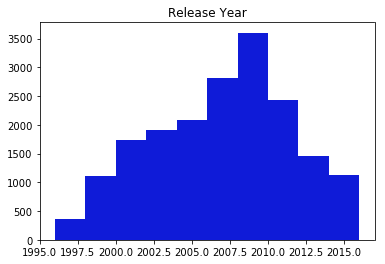

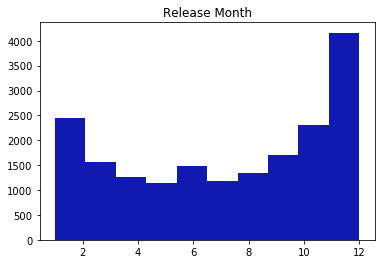

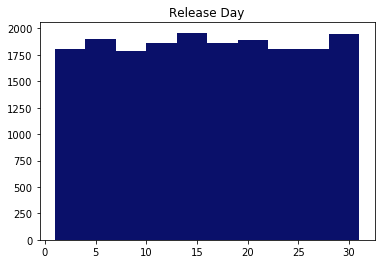

In [368]:
plt.hist(ign_df['release_year'], color='#0F1BD8') # counts of releases per year
plt.title('Release Year')
plt.show()

plt.hist(ign_df['release_month'], color='#101AB0') # releases per month, no surpsises
plt.title('Release Month')
plt.show()

plt.hist(ign_df['release_day'], color='#0A106A') # just for fun
plt.title('Release Day')
plt.show()


So with these histograms we see a few things. First off, 2008 and 2009 were a mad house for game releases and has been steadily falling since. Looking at monthly releases, November dominates for new game releases, most likely driven by a pursuit of xmas sales. There is a spike in July, probably driven by summer's freetime. The release pattern for days of the month shows a very subtle wave form, but nothing drastic. 

Digging in deeper, let's take a look at what kinds of games are being made. 

In [221]:
genre_count = ign_df.genre.value_counts()
genre_count.head(60)# gonna have to clean those genres up

Action                       3797
Sports                       1916
Shooter                      1610
Racing                       1228
Adventure                    1174
Strategy                     1071
RPG                           980
Platformer                    823
Puzzle                        776
Action, Adventure             765
Simulation                    567
Fighting                      547
Music                         371
Action, RPG                   330
Racing, Action                210
Puzzle, Action                200
Sports, Action                196
Party                         141
Wrestling                     134
Flight, Action                125
Trivia                        119
Board                         116
Hunting                       112
Card                          108
Action, Compilation            89
Virtual Pet                    82
Fighting, Action               77
Strategy, RPG                  77
Pinball                        77
Compilation   

In [370]:
len(ign_df.genre.unique())

113

These genre names are problematic. There are 113 unique names in genre and 'Action' shows up twice in the top 10. Let's address that. 

In [349]:
ign_df['second_genre'] = ign_df['genre'].str.partition(', ')
# cleaning up the genres


In [352]:
ign_df.groupby(ign_df['second_genre']).title.count() # much better

second_genre
Action          5019
Adult              2
Adventure       1200
Baseball           1
Battle            32
Board            123
Card             174
Casino            31
Compilation       57
Educational       69
Fighting         647
Flight           189
Hardware           2
Hunting          115
Music            422
Other             22
Party            141
Pinball           78
Platformer       842
Productivity      41
Puzzle          1040
RPG              995
Racing          1470
Shooter         1640
Simulation       568
Sports          2183
Strategy        1150
Trivia           119
Virtual Pet       82
Wrestling        135
Name: title, dtype: int64

In [355]:
ign_df.to_csv('working_ign.csv') # export the updated dataframe

In [371]:
len(ign_df.second_genre.unique())

31

Now there are 31 genres to work with. That's much better. 

Only 18% of games in this dataset are Editors Choice games. Let's plot the genre counts for the whole data frame and compare them to the genre counts for the editor's choice. 

In [373]:
ign_df['genre'].groupby(ign_df['editors_choice']).count() # look at editors choice

editors_choice
N    15073
Y     3515
Name: genre, dtype: int64

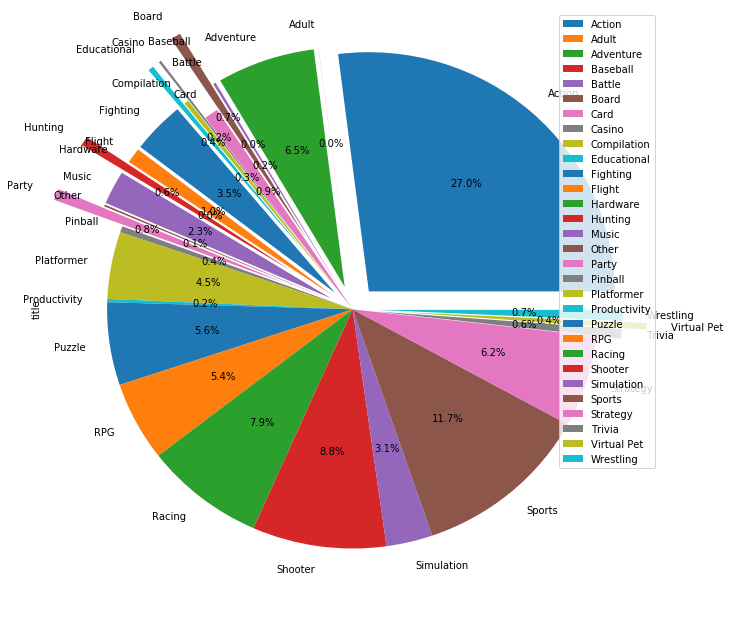

In [401]:
# checking out genre ratios for whole data frame
explodeTuple = (0.1,
                0.1,
                0.1,
                0.2,
                0.1,
                0.35,
                0.0,
                0.3,
                0.1,
                0.3,
                0.1,
                0.1,
                0.1,
                0.3,
                0.1,
                0.1,
                0.3,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.1,
                0.2,
                0.1)
ign_df.groupby(['second_genre']).title.count().plot(kind='pie',
                                                    figsize=[11,11],
                                                    legend=True,
                                                    autopct='%1.1f%%',
                                                    explode=explodeTuple)

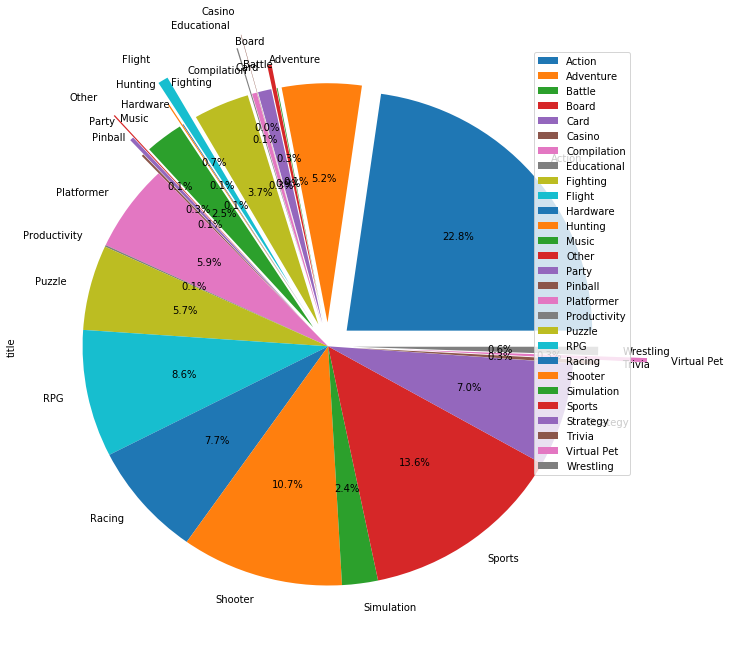

In [399]:
editors_choice = ign_df[ign_df.editors_choice == 'Y']
explode2uple = (0.1,
                0.1,
                0.1,
                0.2,
                0.1,
                0.35,
                0.1,
                0.3,
                0.1,
                0.3,
                0.1,
                0.2,
                0.1,
                0.3,
                0.18,
                0.1,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.0,
                0.1,
                0.3,
                0.1)
editors_choice.groupby(['second_genre']).title.count().plot(kind='pie',
                                                            figsize=[11,11],
                                                            legend=True,
                                                            autopct='%1.1f%%',
                                                            explode=explode2uple)
# checking out genre ratios for editors choice

Comparing the pie charts above, a couple things stand out. First off, 'Adult' and 'Baseball' genres do not even appear in the Editors Choice. Thats not terribly surprising, considering they each only had 2 and 1 games in their counts, respectively. The next thing is that there is a shift in size for a few of the remaining genres. 'Action', 'Adventure', and 'Racing' shrink their portion of market share while 'Sports', 'Strategy', 'Shooter', 'RPG', 'Puzzle', and 'Platformer' each gain market share in the editors choice. The largest shift happened to 'RPG', gaining 3 percentage points in the editors choice. Let's take a look at the mean scores for each of the genres and see if there is a favored genre. 

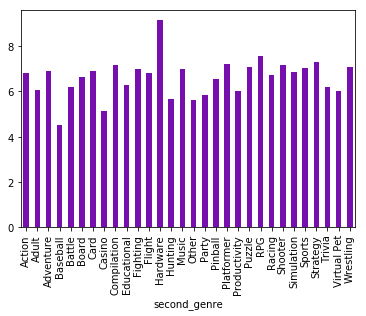

In [323]:
ign_df.groupby(['second_genre']).score.mean().plot(kind='bar', color='#770FAF')

It would appear that 'Hardware' is a favored genre, except there are only 2 data points in that genre. 'Hardware', 'Adult', and 'Baseball' each have less than 3 games in their genres.

The mean scores seem to be pretty evenly distributed, except for 'Hardware'.

Let's look at platform distribution.

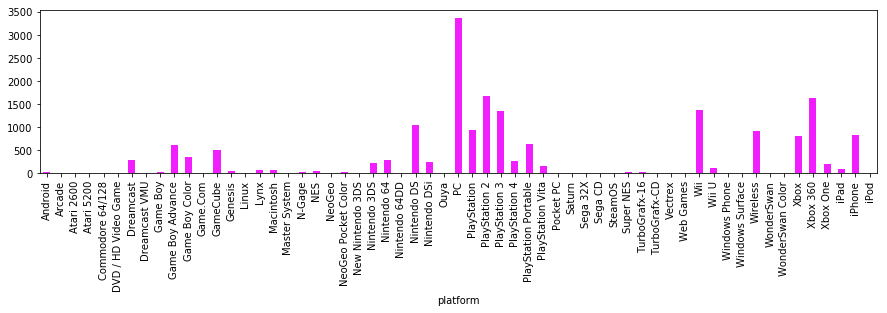

In [372]:
ign_df.groupby(['platform']).title.count().plot(kind='bar',
                                                figsize=[15,3],
                                                color='#F11FFF')
plt.show() # checking out number of titles per platform

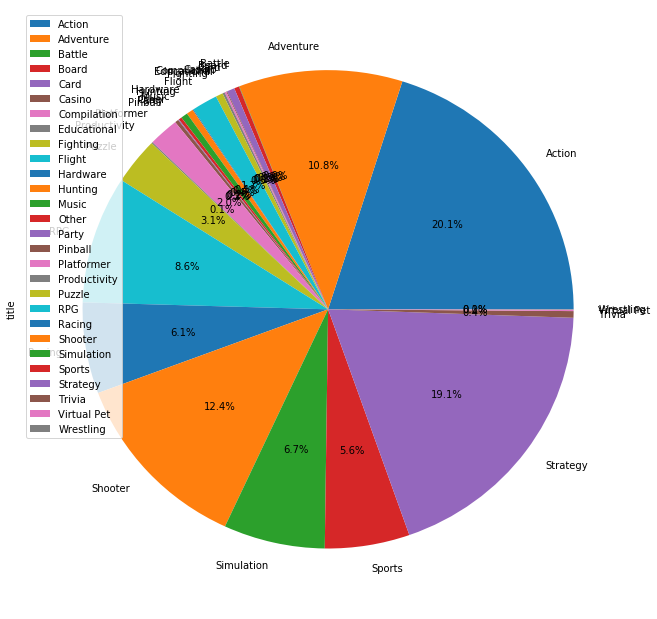

In [413]:
ign_df[ign_df['platform'] == 'PC'].groupby(['second_genre']).title.count().plot(kind='pie',
                                                            figsize=[11,11],
                                                            legend=True,
                                                            autopct='%1.1f%%')

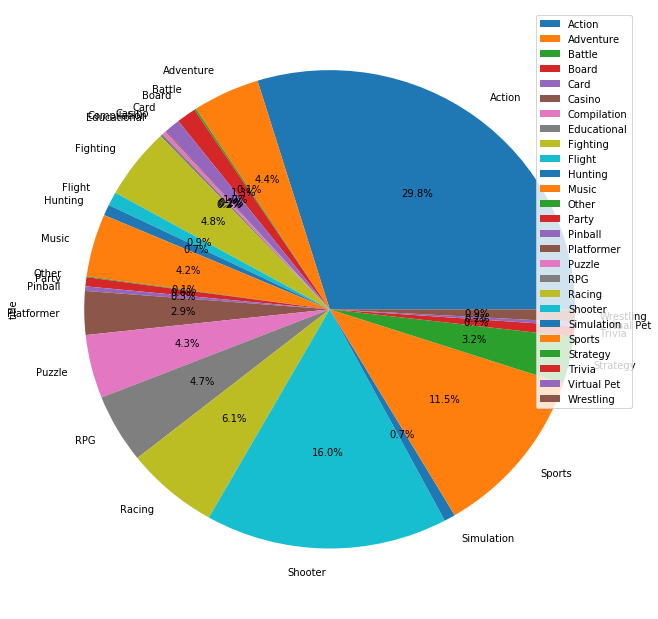

In [415]:
ign_df[ign_df['platform'] == 'Xbox 360'].groupby(['second_genre']).title.count().plot(kind='pie',
                                                                                      figsize=[11,11],
                                                                                      legend=True,
                                                                                      autopct='%1.1f%%')

After exploring this data set, lots of questions come to mind. Why does PC dominate the market so hard? When did each platform join the market? How did each different platform change the market for the others? Why do 'Action' and 'Shooter' games hold such large market portions in all itereations?

The question I chose to pursue is 'Is there genre preference in the editors choice?' When comparing the precentages of genres vs editors choice genres, the 'Sports', 'RPG', and 'Shooter' genres were each larger in the editors choice vs general population. This made me ask 'Do game reviewers give generally better review scores for the genre of games they personally prefer the most?'

Problem: How to prevent unconcious bias in game reviews? 

Preference for a certain genre can lead game reviewers to give lower over all scores to games that are NOT in their personally preferred genre, possibly unfairly evaluating those games. Action games are by far the most populous genre, for all platforms, but their % of market share is lower in the Editors Choice games.

Potential solution: Having game reviewers review games that are NOT in their favorite game genres will decrease unfair scoring.(No rose colored glasses.)

Method for testing: 
To determine if reviewers are using rose colored glasses for their preferred genre of games, we will split the reviewers into two groups. The control group will continue to get games assigned as they normally do. The test group will get games assigned to them that coincide with their preferred genres for 3 months, then that do NOT coincide for 3 months. Each reviewer will complete a survey on demographic information and game genre and platform preferences. At the end of the 6 months, we will compare the scores given for preferred vs non-preferred games, and also compare those games scores to the scores given by the control group. 

If the preferred game genres garner scores 10% higher compared to the control group, reveiwers should no longer review games that are in their preferred genre. 

If no difference is seen, conclude there is no bias in the reviewing process.